In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
data = pd.read_csv('Concrete Compressive Strength.csv')


In [ ]:
print(data.head())
print(data.info())


   Cement   Blast Furnace Slag   Fly Ash   Water  Superplasticizer   \
0    540.0                  0.0       0.0  162.0                2.5   
1    540.0                  0.0       0.0  162.0                2.5   
2    332.5                142.5       0.0  228.0                0.0   
3    332.5                142.5       0.0  228.0                0.0   
4    198.6                132.4       0.0  192.0                0.0   

   Coarse Aggregate    Fine Aggregate   Age (day)  \
0              1040.0            676.0         28   
1              1055.0            676.0         28   
2               932.0            594.0        270   
3               932.0            594.0        365   
4               978.4            825.5        360   

   Concrete compressive strength(MPa)   
0                            79.986111  
1                            61.887366  
2                            40.269535  
3                            41.052780  
4                            44.296075  
<class '

In [ ]:
print(data.describe())


           Cement   Blast Furnace Slag      Fly Ash         Water  \
count  1030.000000          1030.000000  1030.000000  1030.000000   
mean    281.165631            73.895485    54.187136   181.566359   
std     104.507142            86.279104    63.996469    21.355567   
min     102.000000             0.000000     0.000000   121.750000   
25%     192.375000             0.000000     0.000000   164.900000   
50%     272.900000            22.000000     0.000000   185.000000   
75%     350.000000           142.950000   118.270000   192.000000   
max     540.000000           359.400000   200.100000   247.000000   

       Superplasticizer   Coarse Aggregate    Fine Aggregate     Age (day)  \
count        1030.000000         1030.000000      1030.000000  1030.000000   
mean            6.203112          972.918592       773.578883    45.662136   
std             5.973492           77.753818        80.175427    63.169912   
min             0.000000          801.000000       594.000000     

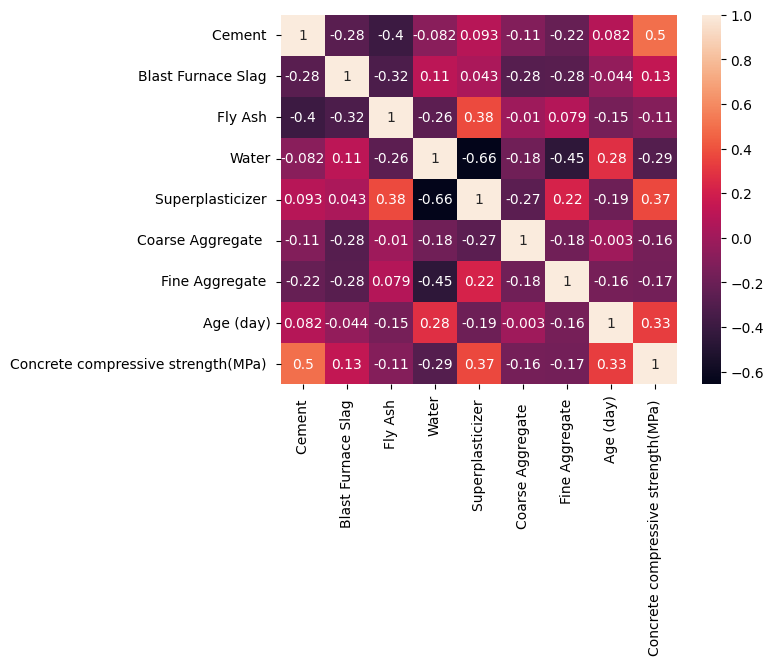

In [ ]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


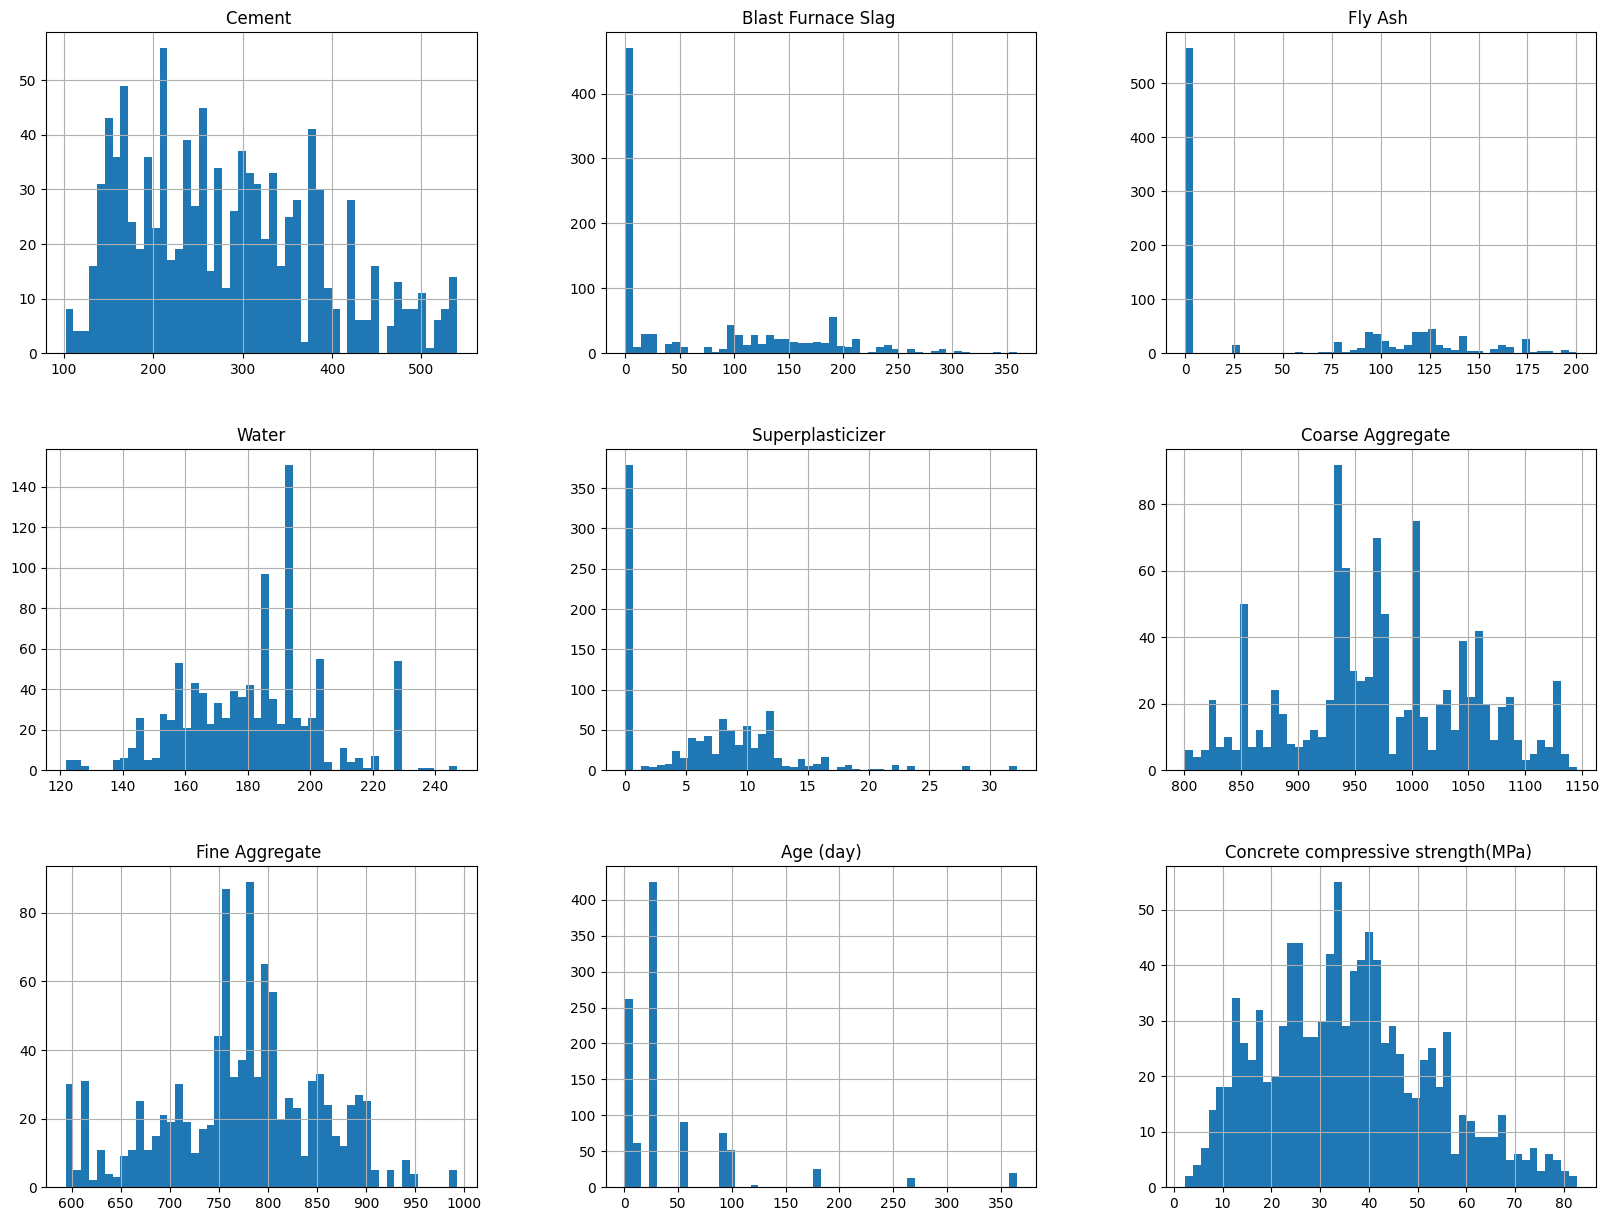

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()


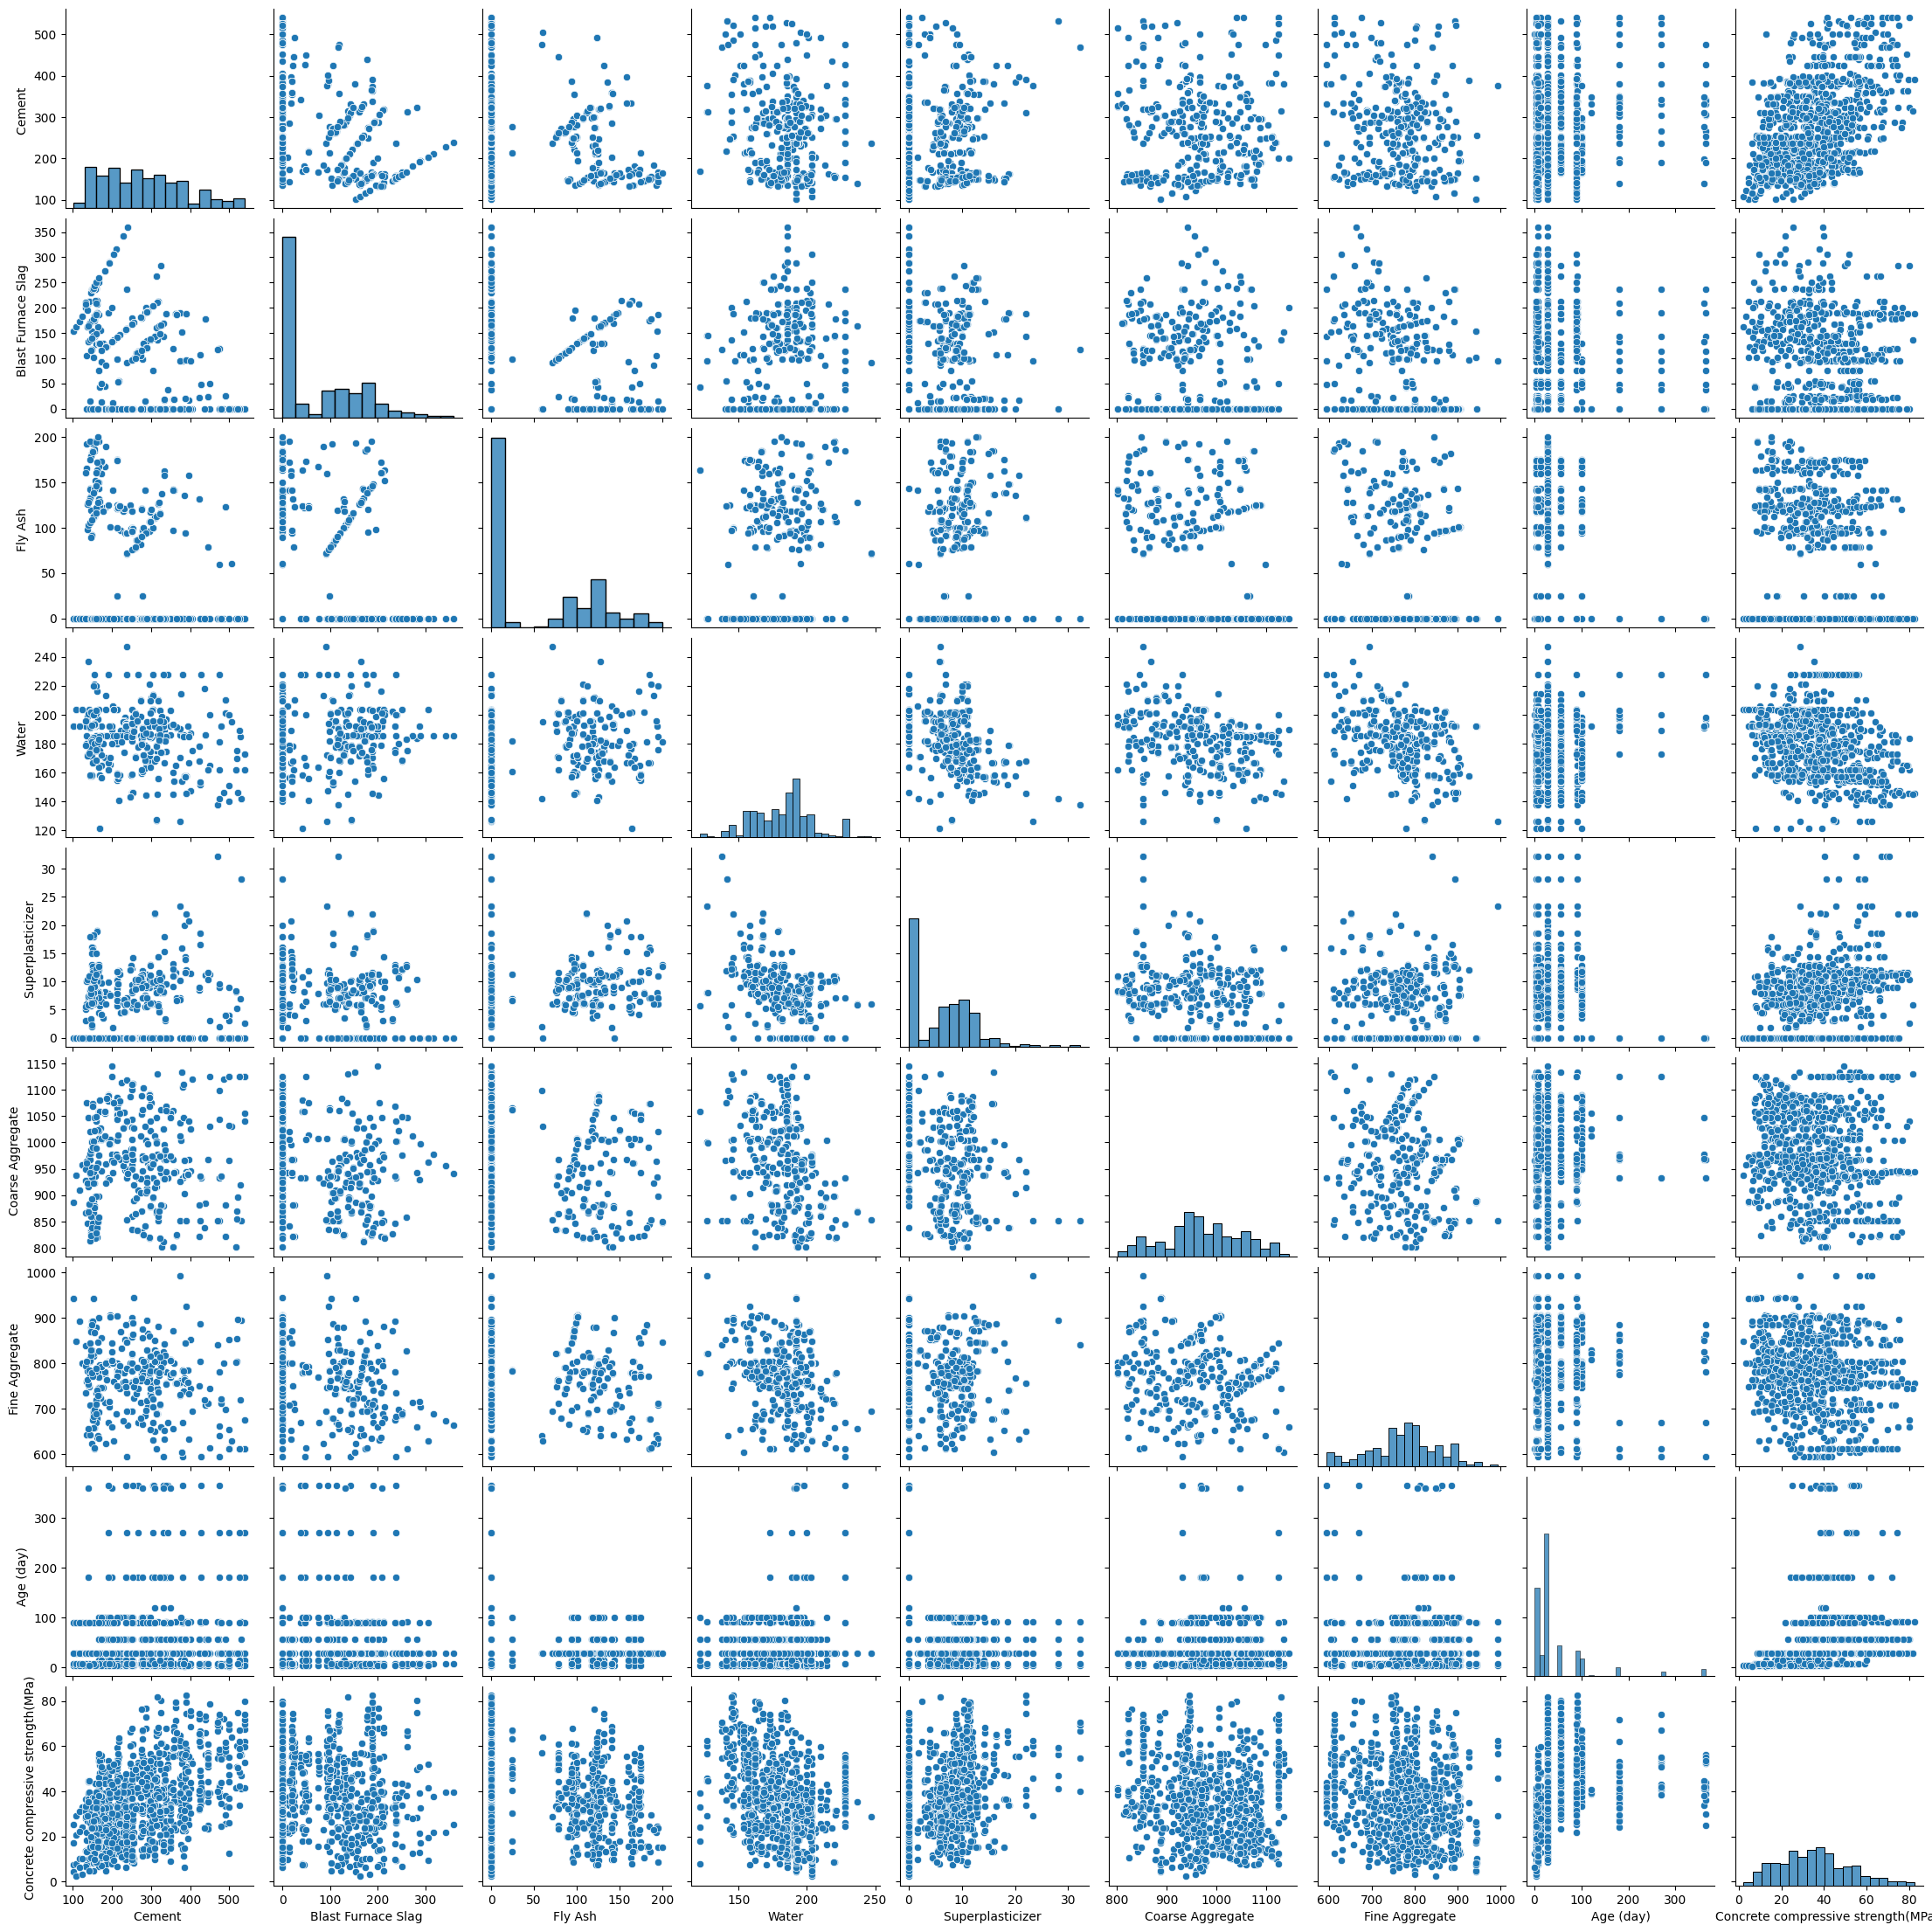

In [ ]:
sns.pairplot(data)
plt.show()


In [ ]:


# Calculate the z-score for each data point
z_scores = np.abs((data - data.mean()) / data.std())

# Set a threshold for the z-score
threshold = 3

# Find data points with a z-score greater than the threshold
outliers = np.where(z_scores > threshold)

# Remove the outliers from the data
data = data.drop(outliers[0])

# Display the cleaned data
print(data)


      Cement   Blast Furnace Slag   Fly Ash   Water  Superplasticizer   \
0       540.0                  0.0       0.0  162.0                2.5   
1       540.0                  0.0       0.0  162.0                2.5   
5       266.0                114.0       0.0  228.0                0.0   
7       380.0                 95.0       0.0  228.0                0.0   
8       266.0                114.0       0.0  228.0                0.0   
...       ...                  ...       ...    ...                ...   
1025    276.4                116.0      90.3  179.6                8.9   
1026    322.2                  0.0     115.6  196.0               10.4   
1027    148.5                139.4     108.6  192.7                6.1   
1028    159.1                186.7       0.0  175.6               11.3   
1029    260.9                100.5      78.3  200.6                8.6   

      Coarse Aggregate    Fine Aggregate   Age (day)  \
0                 1040.0            676.0         28   

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler



# Split the dataset into features and target variable
X = data.iloc[:, :-1] # Select all columns except the last one
y = data.iloc[:, -1] # Select only the last column

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# Split the standardized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate the performance of the model on the testing set
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 91.50230988664524


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)


R2 score: 0.6531238887103188


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 7.385169872579076


In [ ]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 9.565683973801624


In [ ]:
from sklearn.metrics import mean_squared_log_error

msle = mean_squared_log_error(y_test, y_pred)
print("Mean Squared Logarithmic Error:", msle)


Mean Squared Logarithmic Error: 0.07971620544989608


Training Error: 80.45814445779499
Testing Error: 91.50230988664524


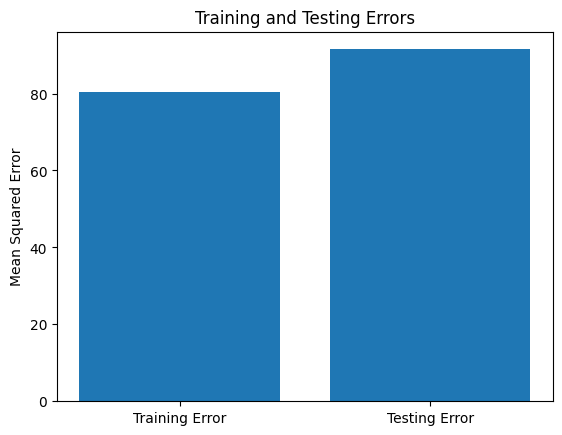

In [ ]:
import matplotlib.pyplot as plt

# Make predictions using the trained model
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate the training and testing errors
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

# Print the training and testing errors
print("Training Error:", train_error)
print("Testing Error:", test_error)

# Plot the training and testing errors
plt.bar(['Training Error', 'Testing Error'], [train_error, test_error])
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Errors')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Evaluate the performance of the model on the testing set
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 32.60893504128468


In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

# Evaluate the performance of the model on the testing set
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 92.24649890990766


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

# Evaluate the performance of the model on the testing set
y_pred = gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 34.477569804544096


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Instantiate the models
rf = RandomForestRegressor()
svr = SVR()
gb = GradientBoostingRegressor()

# Train the models
rf.fit(X_train, y_train)
svr.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_rf = rf.predict(X_train)
y_test_rf = rf.predict(X_test)

y_train_svr = svr.predict(X_train)
y_test_svr = svr.predict(X_test)

y_train_gb = gb.predict(X_train)
y_test_gb = gb.predict(X_test)

# Calculate the mean squared error for the training and testing sets
train_mse_rf = mean_squared_error(y_train, y_train_rf)
test_mse_rf = mean_squared_error(y_test, y_test_rf)

train_mse_svr = mean_squared_error(y_train, y_train_svr)
test_mse_svr = mean_squared_error(y_test, y_test_svr)

train_mse_gb = mean_squared_error(y_train, y_train_gb)
test_mse_gb = mean_squared_error(y_test, y_test_gb)

print("Random Forest: ")
print("Training MSE:", train_mse_rf)
print("Testing MSE:", test_mse_rf)

print("SVR: ")
print("Training MSE:", train_mse_svr)
print("Testing MSE:", test_mse_svr)

print("Gradient Boosting: ")
print("Training MSE:", train_mse_gb)
print("Testing MSE:", test_mse_gb)


Random Forest: 
Training MSE: 3.307612383561657
Testing MSE: 32.61265882562592
SVR: 
Training MSE: 74.79709596993713
Testing MSE: 92.24649890990766
Gradient Boosting: 
Training MSE: 12.486142208071776
Testing MSE: 34.51280418339768


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Split the dataset into features and target variable
X = data.iloc[:, :-1] # Select all columns except the last one
y = data.iloc[:, -1] # Select only the last column

# Perform cross-validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Evaluate the model on the testing set
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Fold {fold+1} Mean Squared Error: {mse}")


Fold 1 Mean Squared Error: 32.543934153428324
Fold 2 Mean Squared Error: 18.885734465200127
Fold 3 Mean Squared Error: 26.57619733145961
Fold 4 Mean Squared Error: 18.89509073043224
Fold 5 Mean Squared Error: 26.77123104416417
